In [77]:
import pandas as pd

df = pd.read_csv("../data/train_(A+B).csv")

df_sorted = df.sort_values(by="Type", ascending=False)

df_sorted.to_csv("../data/train_(A+B)_sorted.csv", index=False)


1.Обучение на исходных данных

c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceW

Best Configuration:
layers        (128, 64, 32, 16)
activation    tanh
solver        lbfgs
F1-avg        0.774
F1-std        0.0262
Acc-avg       0.8182
Acc-std       0.0161


c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


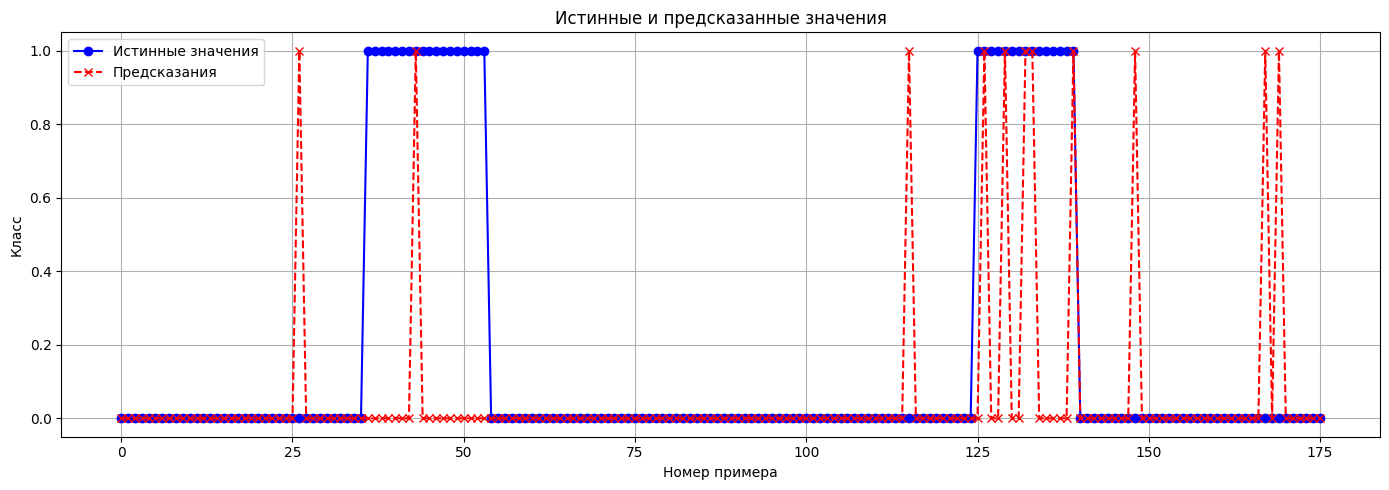

c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perce

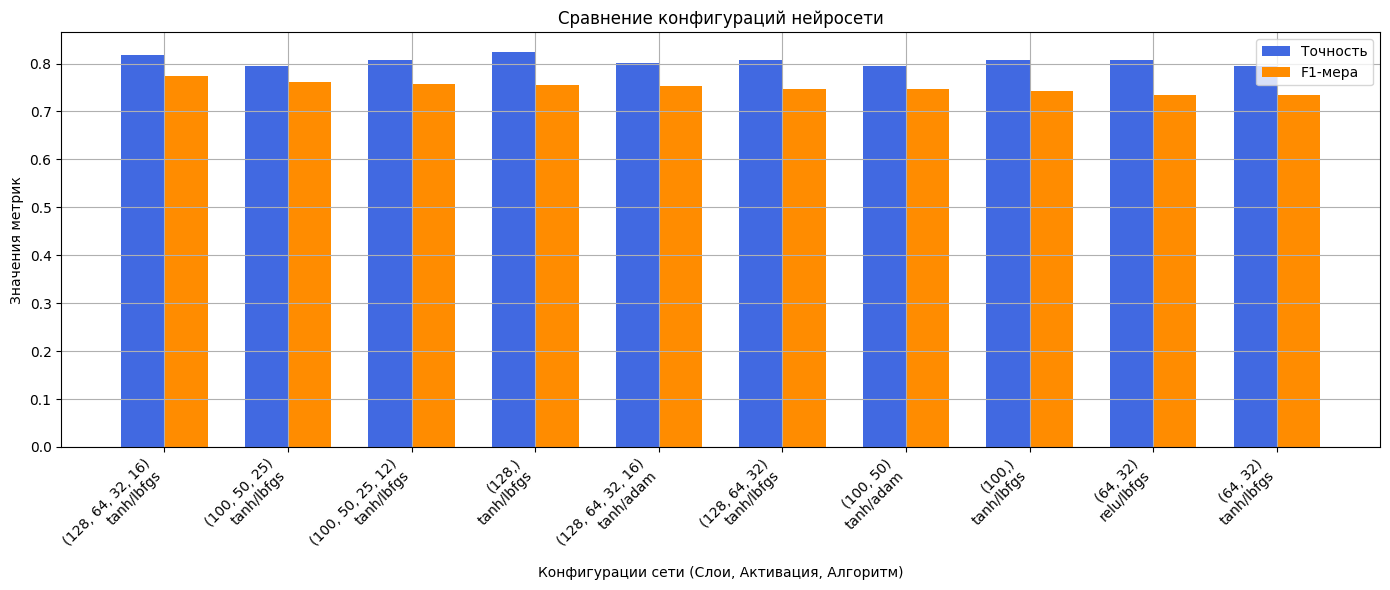

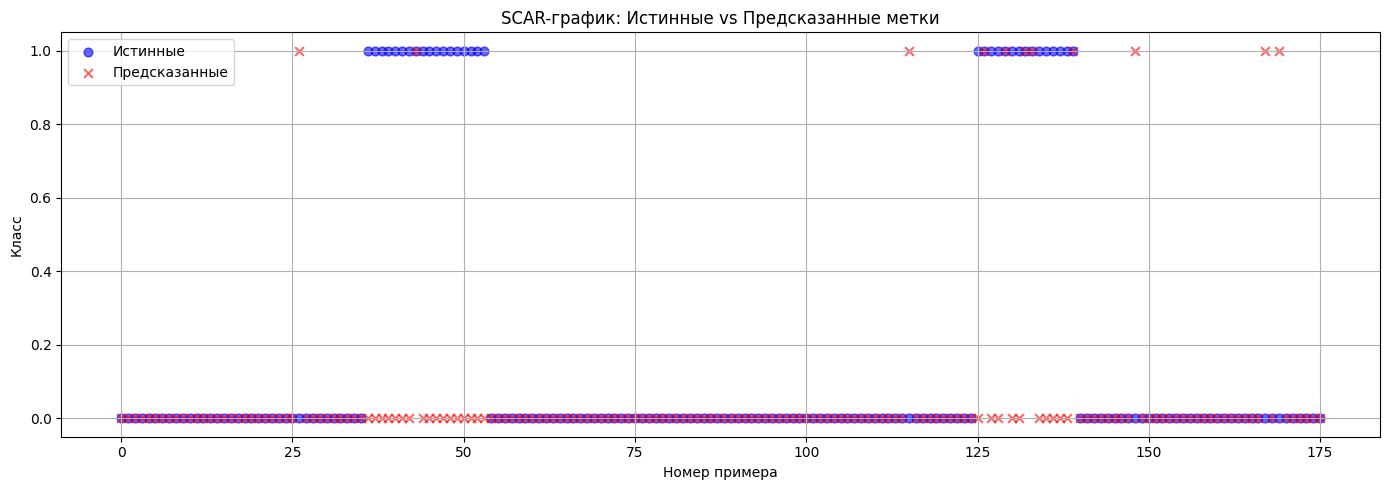

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

data = pd.read_csv('../data/train_(A+B).csv')
X = data.drop(columns=["Type"])
y = data["Type"]

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32), (128, 64, 32, 16), (100, 50, 25, 12)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=4, return_train_score=False)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X, y, cv=4)

f1_scores = cross_val_score(best_model, X, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X, y, cv=4, scoring='accuracy')

print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

plt.figure(figsize=(14, 5))
plt.plot(y.values, 'bo-', label='Истинные значения')
plt.plot(y_pred_cv, 'x--', color='red', label='Предсказания')
plt.xlabel("Номер примера")
plt.ylabel("Класс")
plt.title("Истинные и предсказанные значения")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

cv_results = pd.DataFrame(grid_search.cv_results_)

cv_results["config"] = cv_results.apply(
    lambda row: f"{row['param_hidden_layer_sizes']}\n{row['param_activation']}/{row['param_solver']}", axis=1
)

top_configs = cv_results.sort_values(by="mean_test_score", ascending=False).head(10)

configs = top_configs["config"].tolist()
f1_scores = top_configs["mean_test_score"].tolist()

acc_scores = []
for i in top_configs.index:
    cfg = {
        'hidden_layer_sizes': cv_results.loc[i, 'param_hidden_layer_sizes'],
        'activation': cv_results.loc[i, 'param_activation'],
        'solver': cv_results.loc[i, 'param_solver'],
        'max_iter': 500,
        'random_state': 42
    }
    model = MLPClassifier(**cfg)
    acc = cross_val_score(model, X, y, cv=4, scoring='accuracy').mean()
    acc_scores.append(acc)

x = np.arange(len(configs))
width = 0.35

plt.figure(figsize=(14, 6))
plt.bar(x - width/2, acc_scores, width, label='Точность', color='royalblue')
plt.bar(x + width/2, f1_scores, width, label='F1-мера', color='darkorange')
plt.xlabel("Конфигурации сети (Слои, Активация, Алгоритм)")
plt.ylabel("Значения метрик")
plt.title("Сравнение конфигураций нейросети")
plt.xticks(x, configs, rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))
plt.scatter(range(len(y)), y, label='Истинные', color='blue', marker='o', s=40, alpha=0.6)
plt.scatter(range(len(y_pred_cv)), y_pred_cv, label='Предсказанные', color='red', marker='x', s=40, alpha=0.6)
plt.title("SCAR-график: Истинные vs Предсказанные метки")
plt.xlabel("Номер примера")
plt.ylabel("Класс")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




# Обучение сети на сортированных данных

c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceW

Best Configuration:
layers        (100, 50, 25, 12)
activation    tanh
solver        lbfgs
F1-avg        0.7851
F1-std        0.0561
Acc-avg       0.8068
Acc-std       0.0568


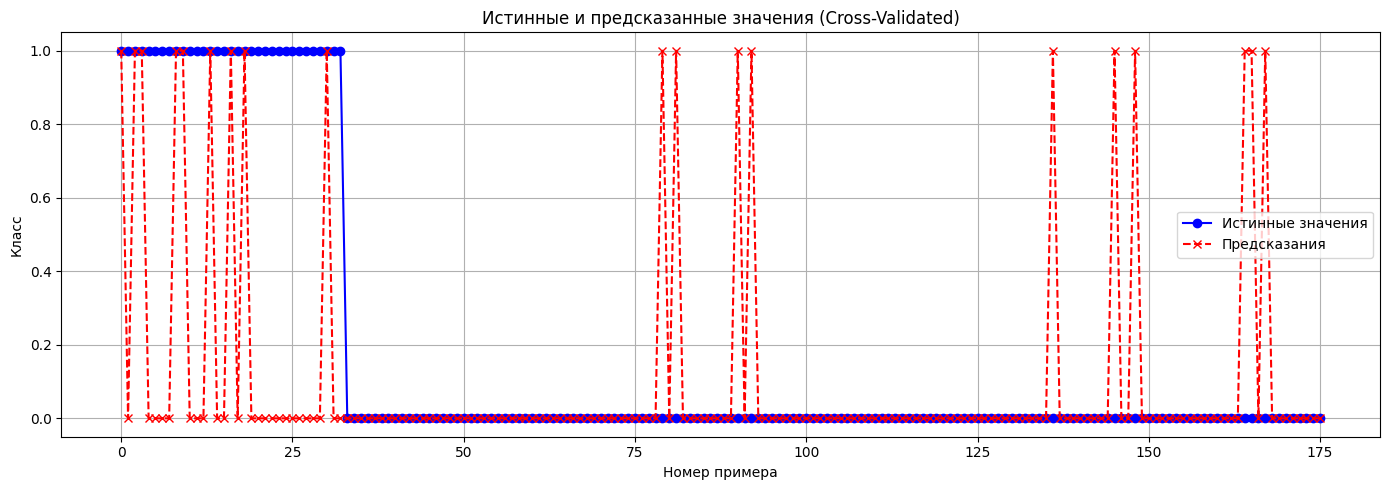

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score

data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32),(128, 64, 32, 16),(100, 50, 25, 12)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer, cv=4, return_train_score=False)
grid_search.fit(X, y)

best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X, y, cv=4)

f1_scores = cross_val_score(best_model, X, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X, y, cv=4, scoring='accuracy')

print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")


plt.figure(figsize=(14, 5))
plt.plot(y.values, 'bo-', label='Истинные значения')
plt.plot(y_pred_cv, 'x--', color='red', label='Предсказания')
plt.xlabel("Номер примера")
plt.ylabel("Класс")
plt.title("Истинные и предсказанные значения (Cross-Validated)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Обучение сети на нормализованных данных

c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

Best Configuration:
layers        (64, 32, 16)
activation    tanh
solver        lbfgs
F1-avg        0.8718
F1-std        0.0422
Acc-avg       0.875
Acc-std       0.041


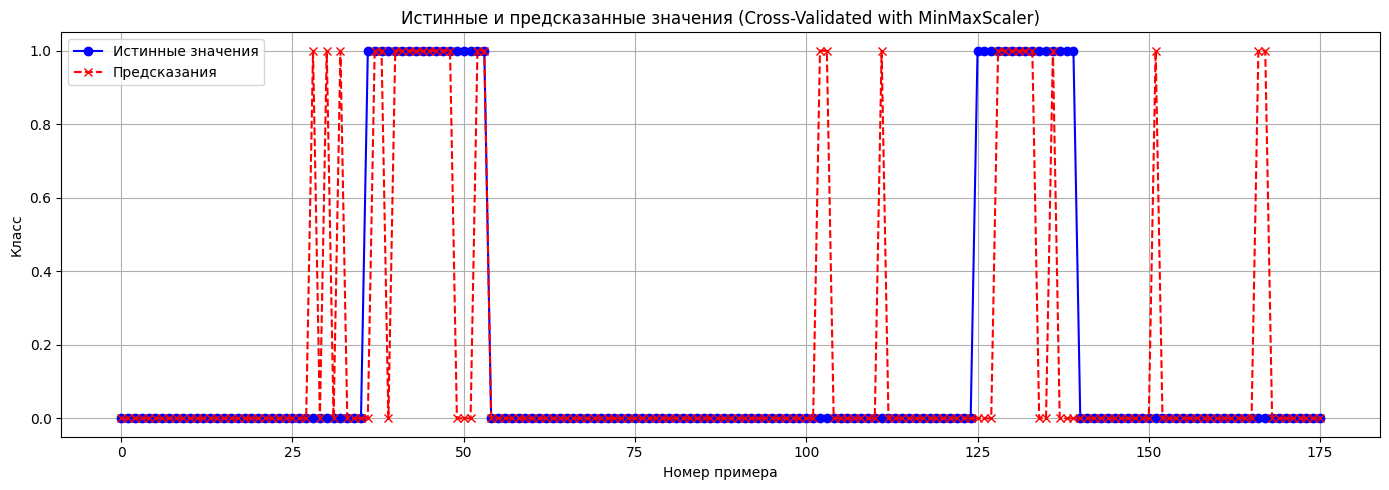

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score

data = pd.read_csv('../data/train_(A+B).csv')
X = data.drop(columns=["Type"])
y = data["Type"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer,
                           cv=4, return_train_score=False)
grid_search.fit(X_scaled, y)

best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X_scaled, y, cv=4)

f1_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring='accuracy')

print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

plt.figure(figsize=(14, 5))
plt.plot(y.values, 'bo-', label='Истинные значения')
plt.plot(y_pred_cv, 'x--', color='red', label='Предсказания')
plt.xlabel("Номер примера")
plt.ylabel("Класс")
plt.title("Истинные и предсказанные значения (Cross-Validated with MinMaxScaler)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the 

Best Configuration:
layers        (100, 50)
activation    relu
solver        adam
F1-avg        0.8975
F1-std        0.0361
Acc-avg       0.9034
Acc-std       0.0336


c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


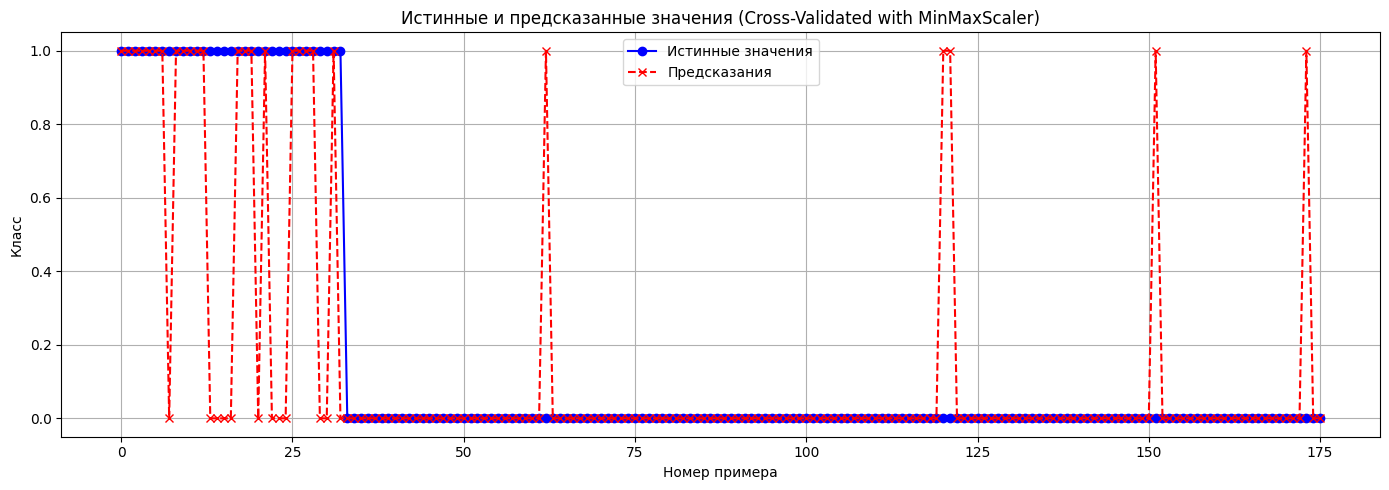

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score

data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (64, 32, 16), (100,), (100, 50), (100, 50, 25),
                           (128,), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scorer,
                           cv=4, return_train_score=False)
grid_search.fit(X_scaled, y)

best_model = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model, X_scaled, y, cv=4)

f1_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model, X_scaled, y, cv=4, scoring='accuracy')

print("Best Configuration:")
print(f"layers        {best_model.hidden_layer_sizes}")
print(f"activation    {best_model.activation}")
print(f"solver        {best_model.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

plt.figure(figsize=(14, 5))
plt.plot(y.values, 'bo-', label='Истинные значения')
plt.plot(y_pred_cv, 'x--', color='red', label='Предсказания')
plt.xlabel("Номер примера")
plt.ylabel("Класс")
plt.title("Истинные и предсказанные значения (Cross-Validated with MinMaxScaler)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Обучение сети на сбалансированных данных

SMOTE

c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Convergen

Best Configuration After SMOTE:
layers        (100,)
activation    tanh
solver        lbfgs
F1-avg        0.9612
F1-std        0.0307
Acc-avg       0.9614
Acc-std       0.0305


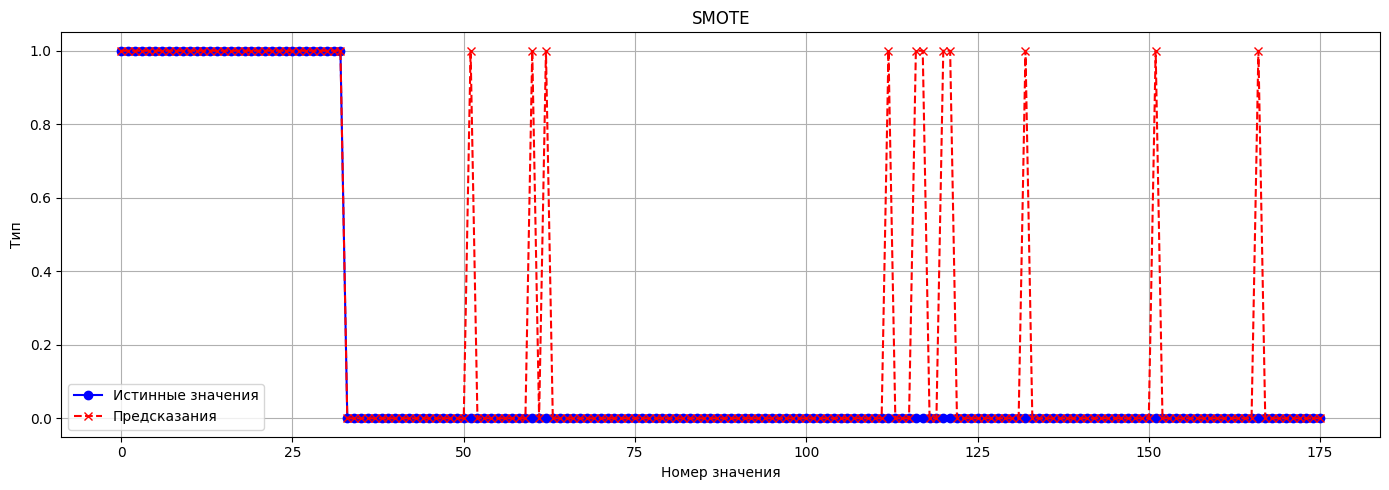

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

scaler_SMOTE = MinMaxScaler()
X_scaled_SMOTE = scaler_SMOTE.fit_transform(X)

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled_SMOTE, y)

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=4)
grid_search.fit(X_bal, y_bal)

best_model_SMOTE = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model_SMOTE, X_bal, y_bal, cv=4)

f1_scores = cross_val_score(best_model_SMOTE, X_bal, y_bal, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model_SMOTE, X_bal, y_bal, cv=4, scoring='accuracy')

print("Best Configuration After SMOTE:")
print(f"layers        {best_model_SMOTE.hidden_layer_sizes}")
print(f"activation    {best_model_SMOTE.activation}")
print(f"solver        {best_model_SMOTE.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

plt.figure(figsize=(14, 5))
plt.plot(y_bal[:176], 'bo-', label='Истинные значения')
plt.plot(y_pred_cv[:176], 'x--', color='red', label='Предсказания')
plt.xlabel("Номер значения")
plt.ylabel("Тип")
plt.title("SMOTE")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


ADASYN

c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Савелий\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: Convergen

Best Configuration After ADASYN:
layers        (64,)
activation    relu
solver        lbfgs
F1-avg        0.9541
F1-std        0.0209
Acc-avg       0.9542
Acc-std       0.0208


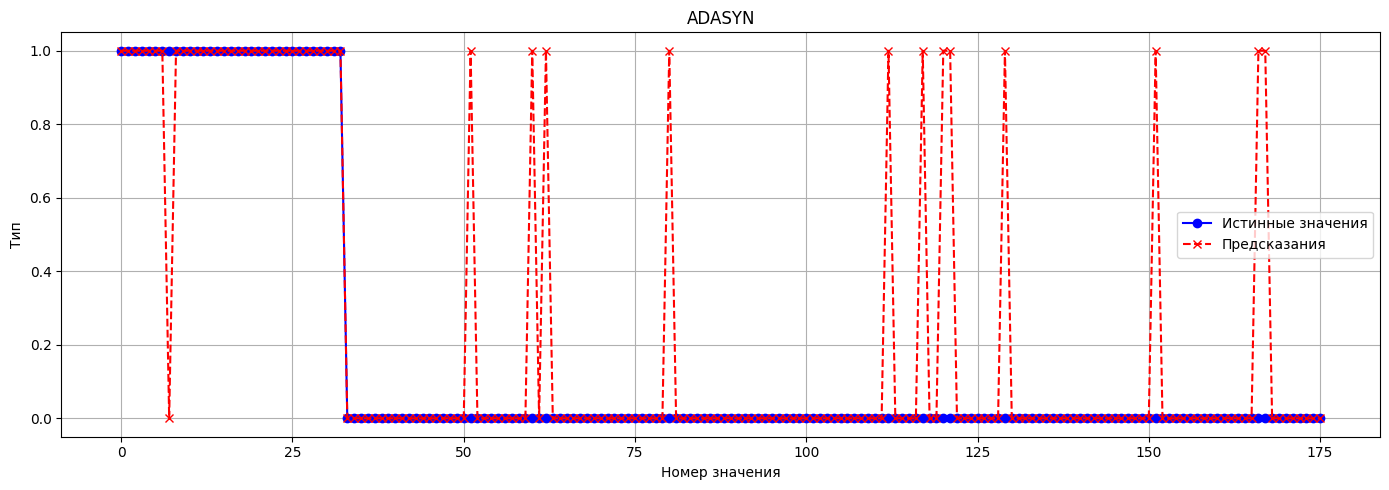

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import ADASYN

data = pd.read_csv('../data/train_(A+B)_sorted.csv')
X = data.drop(columns=["Type"])
y = data["Type"]

scaler_ADASYN = MinMaxScaler()
X_scaled_ADASYN = scaler_ADASYN.fit_transform(X)

adasyn = ADASYN(random_state=42)
X_bal, y_bal = adasyn.fit_resample(X_scaled_ADASYN, y)

param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (100,), (100, 50), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

model = MLPClassifier(max_iter=500, random_state=42)
scorer = make_scorer(f1_score, average='weighted')
grid_search = GridSearchCV(model, param_grid, scoring=scorer, cv=4)
grid_search.fit(X_bal, y_bal)

best_model_ADASYN = grid_search.best_estimator_
y_pred_cv = cross_val_predict(best_model_ADASYN, X_bal, y_bal, cv=4)

f1_scores = cross_val_score(best_model_ADASYN, X_bal, y_bal, cv=4, scoring=make_scorer(f1_score, average='weighted'))
acc_scores = cross_val_score(best_model_ADASYN, X_bal, y_bal, cv=4, scoring='accuracy')

print("Best Configuration After ADASYN:")
print(f"layers        {best_model_ADASYN.hidden_layer_sizes}")
print(f"activation    {best_model_ADASYN.activation}")
print(f"solver        {best_model_ADASYN.solver}")
print(f"F1-avg        {round(f1_scores.mean(), 4)}")
print(f"F1-std        {round(f1_scores.std(), 4)}")
print(f"Acc-avg       {round(acc_scores.mean(), 4)}")
print(f"Acc-std       {round(acc_scores.std(), 4)}")

plt.figure(figsize=(14, 5))
plt.plot(y_bal[:176], 'bo-', label='Истинные значения')
plt.plot(y_pred_cv[:176], 'x--', color='red', label='Предсказания')
plt.xlabel("Номер значения")
plt.ylabel("Тип")
plt.title("ADASYN")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Проверка сети на контрольной выборке C

Контрольная выборка C (использование SMOTE):
Accuracy: 0.8966
F1 Score (weighted): 0.8997


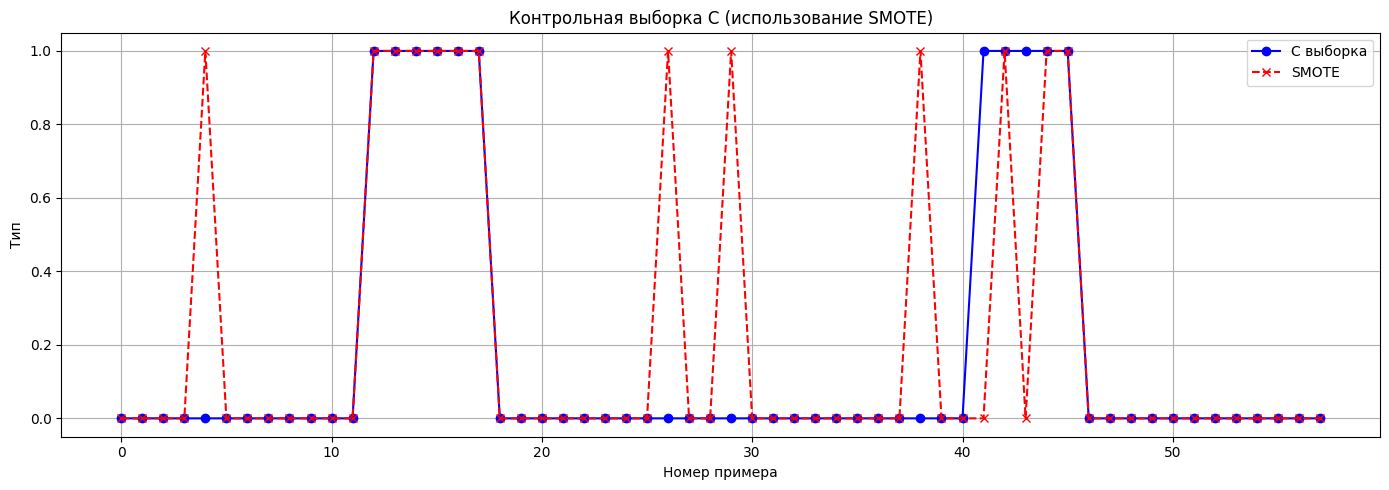

In [8]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

test_C = pd.read_csv("../data/test_C.csv")  
X_C = test_C.drop(columns=["Type"])
y_C = test_C["Type"]

X_C_scaled = scaler_SMOTE.transform(X_C)

y_C_pred = best_model_SMOTE.predict(X_C_scaled)

acc_C = accuracy_score(y_C, y_C_pred)
f1_C = f1_score(y_C, y_C_pred, average='weighted')

print("Контрольная выборка C (использование SMOTE):")
print(f"Accuracy: {round(acc_C, 4)}")
print(f"F1 Score (weighted): {round(f1_C, 4)}")

plt.figure(figsize=(14, 5))
plt.plot(y_C.values[:150], 'bo-', label='C выборка')
plt.plot(y_C_pred[:150], 'x--', color='red', label='SMOTE')
plt.xlabel("Номер примера")
plt.ylabel("Тип")
plt.title("Контрольная выборка C (использование SMOTE)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
